In [2]:
import os
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.potential as gp
from gala.units import galactic, solarsystem, dimensionless


In [3]:
ptmass = gp.KeplerPotential(m=1.*u.Msun, units=solarsystem)
ptmass

<KeplerPotential: m=1.00 (AU,yr,solMass,rad)>

In [4]:
gp.KeplerPotential(m=1047.6115*u.Mjup, units=solarsystem)

<KeplerPotential: m=1.00 (AU,yr,solMass,rad)>

In [5]:
gp.KeplerPotential(m=1., units=solarsystem)

<KeplerPotential: m=1.00 (AU,yr,solMass,rad)>

In [6]:
gp.KeplerPotential(m=1., units=None)

<KeplerPotential: m=1.00 (dimensionless)>

In [7]:
ptmass.energy([1.,-1.,0.]*u.au)

<Quantity [-27.91440236] AU2 / yr2>

In [8]:
ptmass.energy([1.,-1.,0.])

<Quantity [-27.91440236] AU2 / yr2>

In [9]:
pos = np.array([[1.,-1.,0],[2.,3.,0]]).T
ptmass.energy(pos*u.au)

<Quantity [-27.91440236, -10.94892941] AU2 / yr2>

In [10]:
ptmass.gradient([1.,-1.,0]*u.au) 

<Quantity [[ 13.95720118],
           [-13.95720118],
           [  0.        ]] AU / yr2>

In [11]:
ptmass.acceleration([1.,-1.,0]*u.au) 

<Quantity [[-13.95720118],
           [ 13.95720118],
           [ -0.        ]] AU / yr2>

In [12]:
pot = gp.HernquistPotential(m=1E9*u.Msun, c=1.*u.kpc, units=galactic)

In [13]:
pot.density([1.,-1.,0]*u.kpc) 

<Quantity [7997938.82200887] solMass / kpc3>

In [14]:
pot.hessian([1.,-1.,0]*u.kpc) 

<Quantity [[[-4.68187913e-05],
            [ 5.92578618e-04],
            [ 0.00000000e+00]],

           [[ 5.92578618e-04],
            [-4.68187913e-05],
            [ 0.00000000e+00]],

           [[ 0.00000000e+00],
            [ 0.00000000e+00],
            [ 5.45759827e-04]]] 1 / Myr2>

Text(0, 0.5, '$M(<r)$ [$\\mathrm{M_{\\odot}}$]')

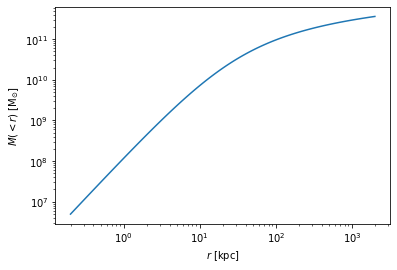

In [15]:
pot = gp.NFWPotential(m=1E11*u.Msun, r_s=20.*u.kpc, units=galactic)
pos = np.zeros((3,100)) * u.kpc
pos[0] = np.logspace(np.log10(20./100.), np.log10(20*100.), pos.shape[1]) * u.kpc
m_profile = pot.mass_enclosed(pos)
plt.loglog(pos[0], m_profile, marker='') 
plt.xlabel("$r$ [{}]".format(pos.unit.to_string(format='latex'))) 
plt.ylabel("$M(<r)$ [{}]".format(m_profile.unit.to_string(format='latex'))) 

Text(0, 0.5, '$\\Phi(x,0,1)$ [$\\mathrm{\\frac{kpc^{2}}{Myr^{2}}}$]')

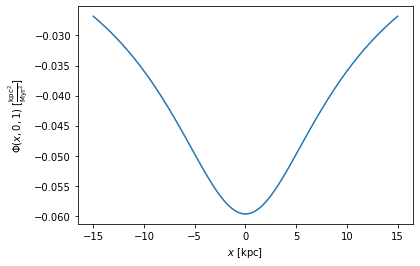

In [16]:
p = gp.MiyamotoNagaiPotential(m=1E11, a=6.5, b=0.27, units=galactic)
fig, ax = plt.subplots(1,1) 
p.plot_contours(grid=(np.linspace(-15,15,100), 0., 1.), marker='', ax=ax) 
E_unit = p.units['energy'] / p.units['mass']
ax.set_xlabel("$x$ [{}]".format(p.units['length'].to_string(format='latex'))) 
ax.set_ylabel("$\Phi(x,0,1)$ [{}]".format(E_unit.to_string(format='latex'))) 

Text(0, 0.5, '$z$ [kpc]')

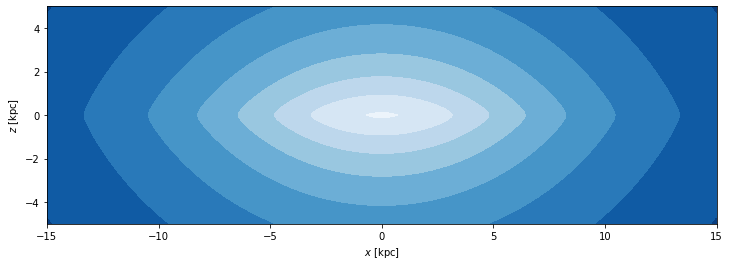

In [17]:
fig,ax = plt.subplots(1, 1, figsize=(12,4))
x = np.linspace(-15,15,100)
z = np.linspace(-5,5,100)
p.plot_contours(grid=(x, 0, z), ax=ax) 
ax.set_xlabel("$x$ [kpc]") 
ax.set_ylabel("$z$ [kpc]") 

Text(0, 0.5, '$z$ [kpc]')

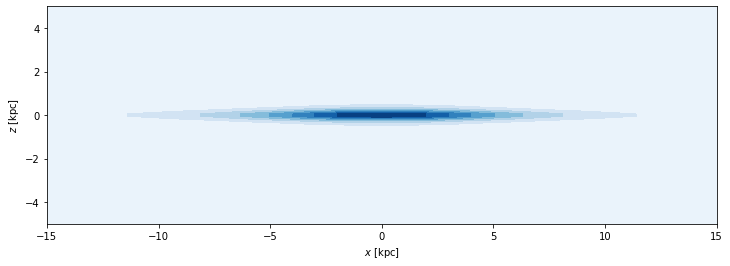

In [19]:
p = 

fig,ax = plt.subplots(1, 1, figsize=(12,4))
x = np.linspace(-15,15,100)
z = np.linspace(-5,5,100)
p.plot_density_contours(grid=(x, 1, z), ax=ax) 
ax.set_xlabel("$x$ [kpc]") 
ax.set_ylabel("$z$ [kpc]") 

In [33]:
from gala.potential import load
pot = gp.NFWPotential(m=6E11*u.Msun, r_s=20.*u.kpc,units=galactic)
pot.save("potential.yml")
load("potential.yml")

<NFWPotential: m=6.00e+11, r_s=20.00 (kpc,Myr,solMass,rad)>

# orbits

In [3]:
import gala.dynamics as gd
pot = gp.NFWPotential(m=1E11*u.Msun, r_s=20.*u.kpc, units=galactic)
w0 = gd.PhaseSpacePosition(pos=[8., 0., 0.]*u.kpc,vel=[0., 50, 0]*u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(w0, dt=1., n_steps=5000)

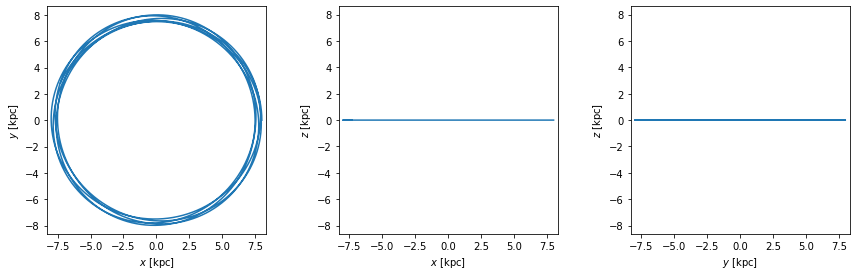

In [4]:
fig = orbit.plot()

In [5]:
import gala.dynamics as gd
pot = gp.NFWPotential(m=1E11*u.Msun, r_s=20.*u.kpc, units=galactic)
w0 = gd.PhaseSpacePosition(pos=[8., 0., 0.]*u.kpc,vel=[0., 150, 0]*u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(w0, dt=1., n_steps=200000)

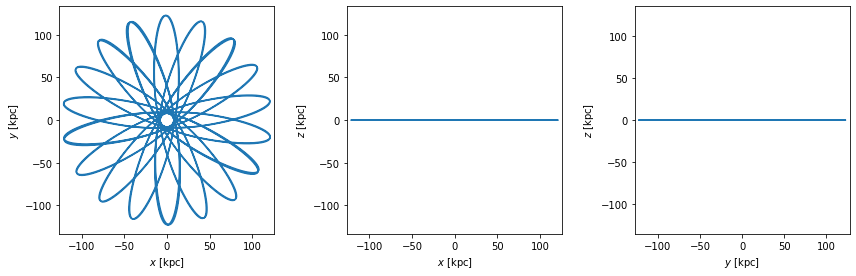

In [6]:
fig = orbit.plot()

In [9]:
import gala.dynamics as gd
pot = gp.NFWPotential(m=1E11*u.Msun, r_s=20.*u.kpc, units=galactic)
w0 = gd.PhaseSpacePosition(pos=[8., 0., 0.]*u.kpc,vel=[0., 100, 100]*u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(w0, dt=10., n_steps=20000)

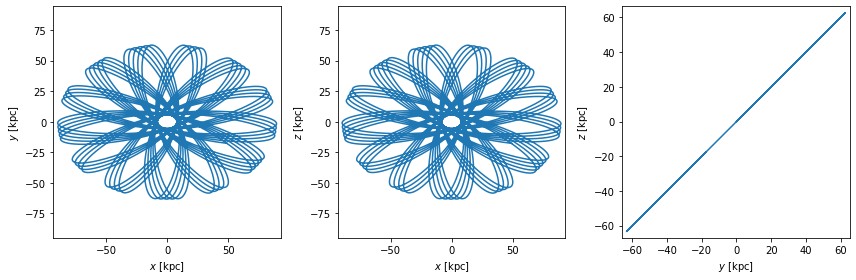

In [10]:
fig = orbit.plot()